<IPython.core.display.Javascript object>


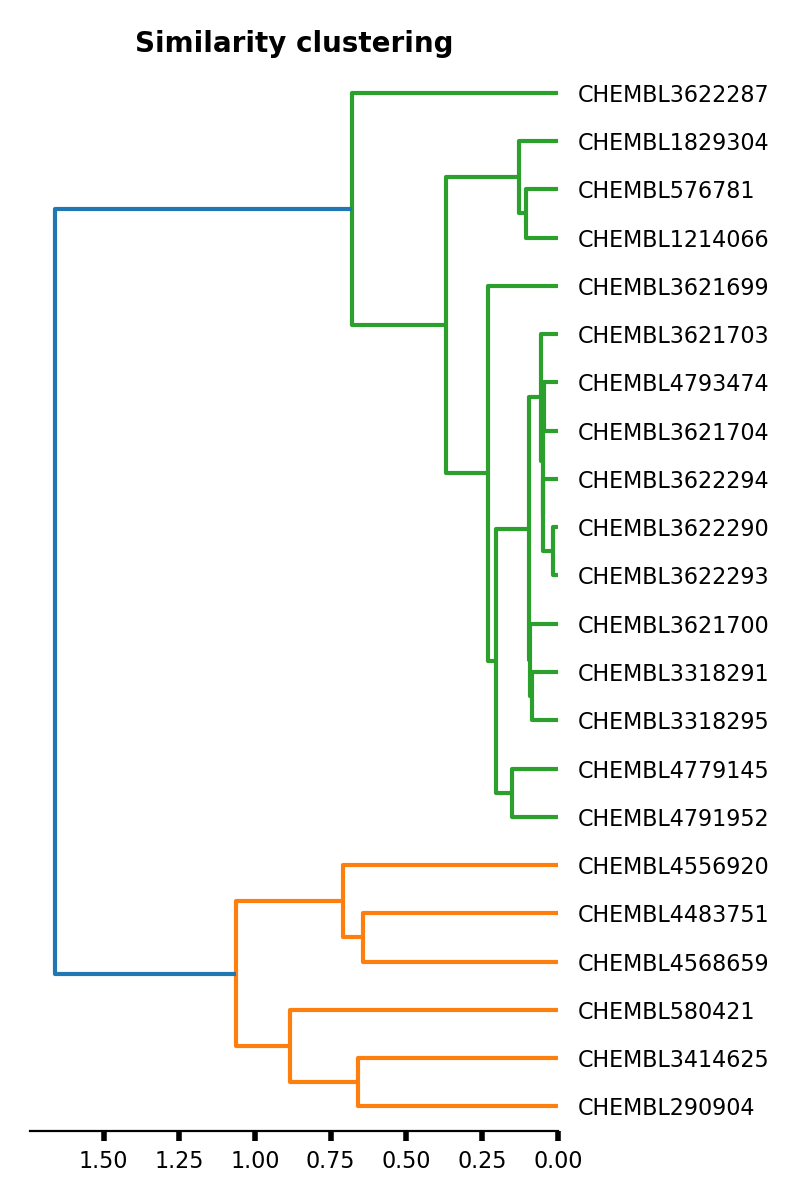

In [380]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw
# All we need for clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# The result of this code will be:
active_smiles = 'data/SETD8.smi' #Comma seperated list of smile, numerical ID


supplier = Chem.SmilesMolSupplier(active_smiles, delimiter=',',smilesColumn=0,
                                      nameColumn=1, titleLine=False)

fps = [FingerprintMols.FingerprintMol(mol) for mol in supplier]

size=len(supplier)
hmap=np.empty(shape=(size,size))
table = pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity = DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex] = similarity
        table.loc[supplier[index].GetProp('_Name'),supplier[jndex].GetProp('_Name')]=similarity

from sklearn.cluster import AgglomerativeClustering
      
linked = linkage(hmap,'single')
labelList = [mol.GetProp('_Name') for mol in supplier]

plt.figure(figsize=(4,6))

ax1=plt.subplot()
o=dendrogram(linked,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Similarity clustering',fontsize=10,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)

plt.tight_layout()
plt.show() 

In [379]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit(table)
labels = cluster.labels_

labels

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])